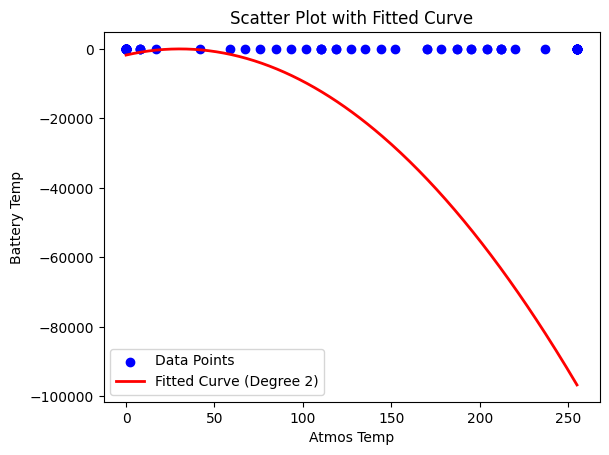

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Load the data
data2 = pd.read_csv('prefinal3.csv')
data3 = pd.read_csv('prefinal4.csv')
data4 = pd.read_csv('prefinal5.csv')
# Renaming columns after creation
data2.columns = ['atmos_temp', 'flow_rate', 'pwm', 'voltage', 'current', 'battery_temp']
data3.columns = ['atmos_temp', 'flow_rate', 'pwm', 'voltage', 'current', 'battery_temp']
data4.columns = ['atmos_temp', 'flow_rate', 'pwm', 'voltage', 'current', 'battery_temp']
# Shift the target column
data2['battery_temp'] = data2['battery_temp'].shift(-60)
data3['battery_temp'] = data2['battery_temp'].shift(-60)
data4['battery_temp'] = data2['battery_temp'].shift(-60)
# Drop rows with NaN values after shifting
data2 = data2.dropna()
data3 = data2.dropna()
data4 = data2.dropna()

data=pd.concat([data2, data3, data4], axis=0)

# Drop duplicates
data.drop_duplicates(subset=None, keep='first', inplace=True)

# Prepare the data (features and target)
X = data.iloc[:, :-1].values  # Use all features
y = data.iloc[:, -1].values

# Scatter plot of raw data
plt.scatter(X[:, 2], y, color='blue', label='Data Points')  # Plot using the first feature (atmos_temp)

# Polynomial Regression (Degree 3)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Generate a range of X values for smooth curve (using atmos_temp)
X_range = np.linspace(X[:, 2].min(), X[:, 2].max(), 300).reshape(-1, 1)

# Create a full feature array by repeating the mean of other features
X_range_full = np.hstack([X_range] + [np.full((300, 1), X[:, i].mean()) for i in range(1, X.shape[1])])

# Transform the full feature set for polynomial regression
X_range_poly = poly.transform(X_range_full)
y_pred = model.predict(X_range_poly)

# Plot the fitted curve
plt.plot(X_range, y_pred, color='red', linewidth=2, label='Fitted Curve (Degree 2)')

plt.xlabel('Atmos Temp')
plt.ylabel('Battery Temp')
plt.title('Scatter Plot with Fitted Curve')
plt.legend()
plt.show()



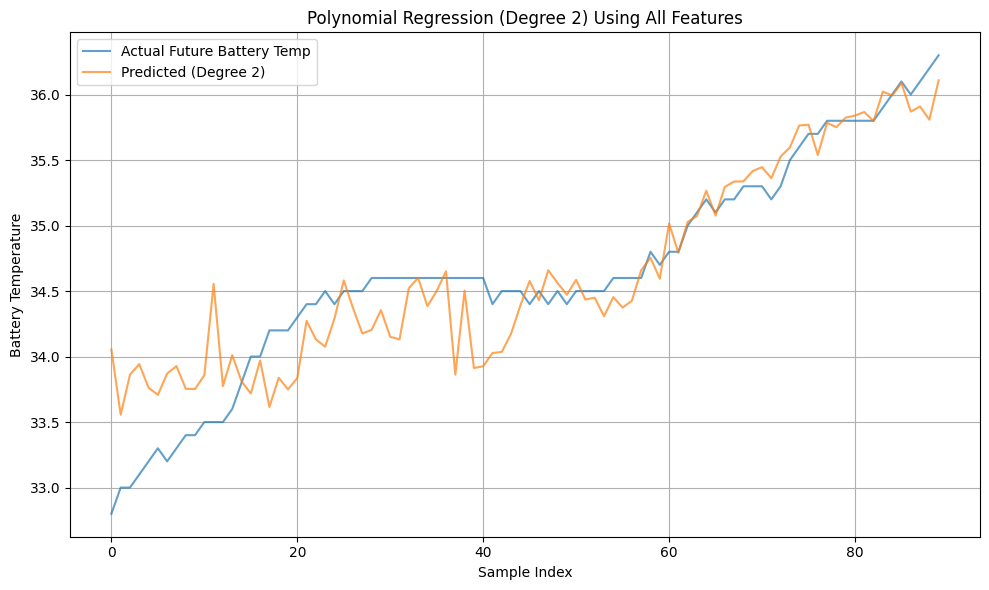

double score(double * input) {
    return 16279.712655016194 + input[0] * 0.0 + input[1] * -395.50761860055127 + input[2] * -87.65583119236972 + input[3] * 2.393971471151668 + input[4] * -1985.2148786728999 + input[5] * 1025.7163950446622 + input[6] * -1.9169514859975347 + input[7] * 4.822841353968439 + input[8] * -0.1122937295211332 + input[9] * 52.048772550006746 + input[10] * -41.88135398463428 + input[11] * -0.5246766735410953 + input[12] * 0.019976903544862347 + input[13] * -3.5692214988196764 + input[14] * -7.417054182175122 + input[15] * -0.00018020907159117916 + input[16] * 0.06061458192526153 + input[17] * 0.12870496916033813 + input[18] * 16.31030742765711 + input[19] * 26.194431687527956 + input[20] * -19.72630933990494;
}



In [13]:
import pandas as pd
import numpy as np
import m2cgen
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the CSV
data2 = pd.read_csv('prefinal3.csv')
data3 = pd.read_csv('prefinal4.csv')
data4 = pd.read_csv('prefinal5.csv')
# Renaming columns after creation
data2.columns = ['atmos_temp', 'flow_rate', 'pwm', 'voltage', 'current', 'battery_temp']
data3.columns = ['atmos_temp', 'flow_rate', 'pwm', 'voltage', 'current', 'battery_temp']
data4.columns = ['atmos_temp', 'flow_rate', 'pwm', 'voltage', 'current', 'battery_temp']
# Shift the target column
data2['battery_temp'] = data2['battery_temp'].shift(-60)
data3['battery_temp'] = data2['battery_temp'].shift(-60)
data4['battery_temp'] = data2['battery_temp'].shift(-60)
# Drop rows with NaN values after shifting
data2 = data2.dropna()
data3 = data2.dropna()
data4 = data2.dropna()

data=pd.concat([data2, data3, data4], axis=0)

# Drop duplicates
data.drop_duplicates(subset=None, keep='first', inplace=True)
col=data.columns

# Features: all original columns
X = data[col[:-1]]
y = data['battery_temp']

# Polynomial transformation with degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y.values, label='Actual Future Battery Temp', alpha=0.7)
plt.plot(y_pred, label='Predicted (Degree 2)', alpha=0.7)
plt.title("Polynomial Regression (Degree 2) Using All Features")
plt.xlabel("Sample Index")
plt.ylabel("Battery Temperature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
c_code=m2cgen.export_to_c(model)
print(c_code)


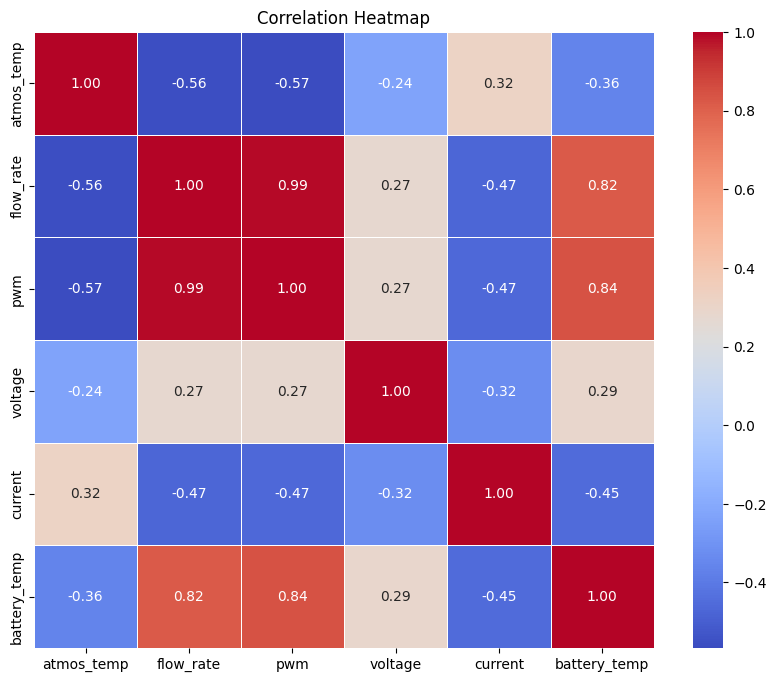

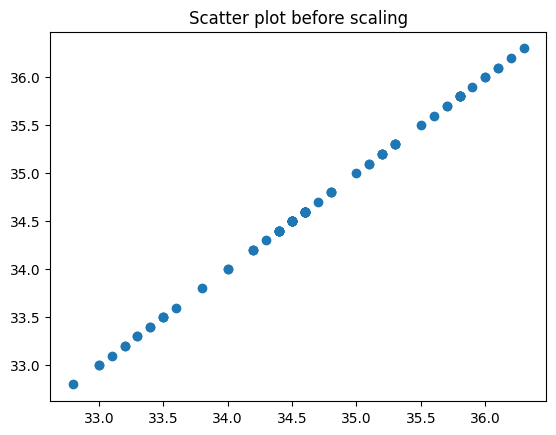

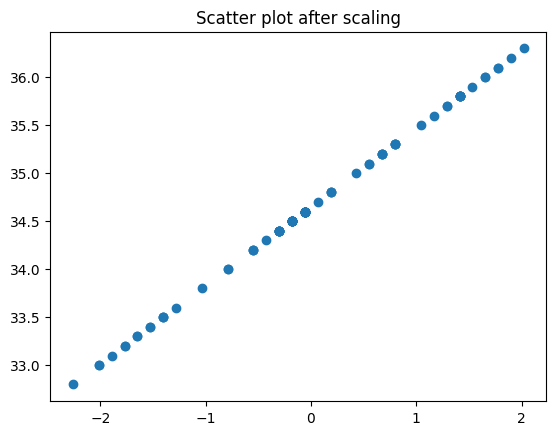

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the data
data2 = pd.read_csv('prefinal3.csv')
data3 = pd.read_csv('prefinal4.csv')
data4 = pd.read_csv('prefinal5.csv')
# Renaming columns after creation
data2.columns = ['atmos_temp', 'flow_rate', 'pwm', 'voltage', 'current', 'battery_temp']
data3.columns = ['atmos_temp', 'flow_rate', 'pwm', 'voltage', 'current', 'battery_temp']
data4.columns = ['atmos_temp', 'flow_rate', 'pwm', 'voltage', 'current', 'battery_temp']
# Shift the target column
data2['battery_temp'] = data2['battery_temp'].shift(-60)
data3['battery_temp'] = data2['battery_temp'].shift(-60)
data4['battery_temp'] = data2['battery_temp'].shift(-60)
# Drop rows with NaN values after shifting
data2 = data2.dropna()
data3 = data2.dropna()
data4 = data2.dropna()

data=pd.concat([data2, data3, data4], axis=0)

# Drop duplicates
data.drop_duplicates(subset=None, keep='first', inplace=True)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Standardize the data
X = data.iloc[:, :-1].values.reshape(-1, 1)  # All columns except the last (target)
y = data.iloc[:, -1].values

# Scatter plot before scaling
plt.scatter(X, y)
plt.title('Scatter plot before scaling')
plt.show()

# Apply StandardScaler
st = StandardScaler()
x_t = st.fit_transform(X)

# Scatter plot after scaling
plt.scatter(x_t, y)
plt.title('Scatter plot after scaling')
plt.show()
